In [1]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
%matplotlib inline
import scipy
import matplotlib.pyplot as plt
import networkx as nx
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy import stats

In [2]:
df = pd.read_csv('/Users/aaronbroderick/Desktop/Data Science Folders/Data/FineFoods.csv')

In [4]:
print(df.shape)
df.head(1)

(568454, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...


The data originally comes from the SNAP website.  https://snap.stanford.edu/data/web-FineFoods.html

## About this data set

In [10]:
print(str(len(set(df.ProductId))) + ' unique products')
print(str(len(set(df.ProfileName))) + ' unique reviewers')

74258 unique products
218417 unique reviewers


Most reviews are positive


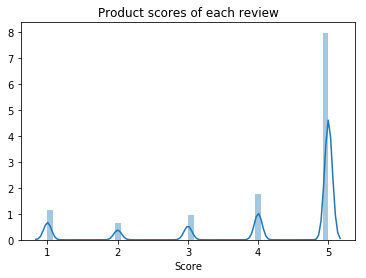

In [17]:
ax = sns.distplot(df.Score)
ax.set_title('Product scores of each review')
print('Most reviews are positive')

Most reviews are not helpful


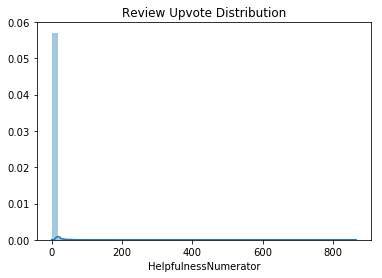

In [43]:
ax = sns.distplot(df.HelpfulnessNumerator)
ax.set_title('Review Upvote Distribution')
print('Most reviews are not helpful')

In [27]:
x = df.ProfileName.value_counts()
names = list(x.index)
reviews = list(x)
pros = pd.DataFrame()
pros['names'] = names[:10]
pros['count'] = reviews[:10]
print('There are people who write lots of reviews.')
pros

There are people who write lots of reviews.


,names,count
0,"C. F. Hill ""CFH""",451
1,"O. Brown ""Ms. O. Khannah-Brown""",421
2,Gary Peterson,389
3,"Rebecca of Amazon ""The Rebecca Review""",365
4,Chris,363
5,Linda,290
6,John,261
7,Mike,260
8,c2,256
9,Laura,253


In [45]:
print('Pro reviews have significantly more impact.')
print('')
print('Upvote mean of all reviews: ' + str(df.HelpfulnessNumerator.mean()))
pros_help = df.loc[df['ProfileName'].isin(names[:10])]
print('Upvote mean of Pro reviews: ' + str(pros_help.HelpfulnessNumerator.mean()))
print(stats.ttest_ind(df.HelpfulnessNumerator,pros_help.HelpfulnessNumerator))

Pro reviews have significantly more impact.

Upvote mean of all reviews: 1.7438174416927315
Upvote mean of Pro reviews: 2.039588999697794
Ttest_indResult(statistic=-2.2232804439385001, pvalue=0.026197284677819156)


In [46]:
w = list(df.ProductId.value_counts().index)
title = w[50]
product = df[df['ProductId'] == title]
product = df[df['ProductId'] == title]
product = product.reset_index(drop = True)
product = pd.DataFrame(product)
product.shape

(455, 10)

New reviews have less impact as time goes on.



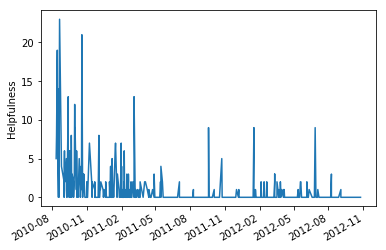

In [57]:
print('New reviews have less impact as time goes on.') 
print('')

def make_dates(integer):
    x = datetime.datetime.fromtimestamp(integer)
    x = str(x)
    x = x.split()
    x = x[0]
    return x

product['datetime'] = product.Time.apply(make_dates)
product['datetime'] = product.datetime.apply(pd.to_datetime)

columns = ['datetime','HelpfulnessNumerator']
test = pd.DataFrame(product[['datetime','HelpfulnessNumerator','Score']])

test = test.sort_values(by='datetime')

x = test.datetime
y = test.HelpfulnessNumerator

# plot
plt.plot(x,y)
# beautify the x-labels
plt.gcf().autofmt_xdate()
plt.ylabel('Helpfulness')
plt.show()

## So how do we find meaningful insight from this dataset?

I think we want to know the following things.  

1. What is the overall opinion of the product?
2. Do the reviews cluster based on subjects?
3. Are there particular details from the reviews that can provide information to improve the product?



## Yeah, but I don't want to write a bunch of code

Ok.  I got you.  

Impact Analysis

https://plot.ly/dashboard/aaronbroderickpiano:34/view?share_key=jNG1qLEKJqP71Vdn3u6tqi

Subject Clustering

https://plot.ly/dashboard/aaronbroderickpiano:35/view?share_key=Pi2A7ops21jC6TlLSjYqXT

## Tell me more  . . .

This product is intended to put accurate text sumarization in front of an analyst in an easy and intuitive format.

The Impact Analysis summarizes reviews from the paragraph to the sentence level, so the analyst can simply mouse over the data point to get the information she needs.  Coupled with features such as expertise, helpfulness and product rating you can glide along the timeline and quickly get a sense of what people are saying about your product. 

Subject Clustering goes a little deeper and uses a parse for nouns, tf_idf, gap statstic, LSA pipeline to determine the correct number of clusters and then to extract the most important words.  Simply toggle between clusters to examine the different discussion topics of your product.  This code is easily transferable to other review sets and will yield a unique number of clusters each time.

Were this to be put into production, it could conceivably be updated weekly by scraping Amazon for your product reviews, or applied to other product review websites.  